<a href="https://colab.research.google.com/github/Mohammadkhilfeh/Prediction-of-Product-Sales/blob/main/Copy_of_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
*Mohammad Khilfeh*

## Project Overview

 ## Load and Inspect Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape
# We have 8523 Rows and 12 Coulmns

(8523, 12)

In [ ]:

cat_cols = df.select_dtypes('object').columns
cat_cols
# We have 7 categorical


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols
# We have 6 numerical columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Checking for duplicates

df.duplicated().sum()    # We don't have any duplicates

0

In [ ]:
#Identifyind missing values for cat_cols
df[cat_cols].isna().sum()  # we have 2410 missing values in Outlet_size


,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
#Identifyind missing values for num_cols
df[num_cols].isna().sum()  # we have 1463 missing value in item_weight

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
df["Outlet_Identifier"].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
df.nunique()


,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [ ]:
df[cat_cols].isna().sum()
#We have missing value in Outlet_Size.

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
df[["Outlet_Identifier" , "Outlet_Type"]].value_counts()

,,count
Outlet_Identifier,Outlet_Type,
OUT027,Supermarket Type3,935
OUT013,Supermarket Type1,932
OUT035,Supermarket Type1,930
OUT046,Supermarket Type1,930
OUT049,Supermarket Type1,930
OUT045,Supermarket Type1,929
OUT018,Supermarket Type2,928
OUT017,Supermarket Type1,926
OUT010,Grocery Store,555


In [ ]:
df[["Outlet_Type" , "Outlet_Size"]].value_counts()

Outlet_Type        Outlet_Size
Supermarket Type1  Small          1860
Supermarket Type3  Medium          935
Supermarket Type1  High            932
                   Medium          930
Supermarket Type2  Medium          928
Grocery Store      Small           528
Name: count, dtype: int64

In [ ]:
df[["Outlet_Size" , "Outlet_Identifier"]].value_counts()

Outlet_Size  Outlet_Identifier
Medium       OUT027               935
High         OUT013               932
Medium       OUT049               930
Small        OUT035               930
             OUT046               930
Medium       OUT018               928
Small        OUT019               528
Name: count, dtype: int64

In [ ]:
df[["Outlet_Type" , "Outlet_Identifier"]].value_counts()

Outlet_Type        Outlet_Identifier
Supermarket Type3  OUT027               935
Supermarket Type1  OUT013               932
                   OUT035               930
                   OUT046               930
                   OUT049               930
                   OUT045               929
Supermarket Type2  OUT018               928
Supermarket Type1  OUT017               926
Grocery Store      OUT010               555
                   OUT019               528
Name: count, dtype: int64

In [ ]:
#df["Outlet_Size"] = df["Outlet_Size"].fillna("Small")
#df["Outlet_Size"].value_counts()

In [ ]:

df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF" : "Low Fat" , "reg" : "Regular" , "low fat" : "Low Fat"})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
df[num_cols].isna().sum()


,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
df[["Item_Weight" , "Item_Type"]].value_counts()

,,count
Item_Weight,Item_Type,
17.60,Snack Foods,30
18.20,Fruits and Vegetables,26
18.25,Snack Foods,25
15.60,Snack Foods,23
15.10,Fruits and Vegetables,22
...,...,...
6.52,Canned,1
12.80,Dairy,1
12.85,Health and Hygiene,1


In [ ]:
df["Item_Type"].value_counts()


,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
filter= df.groupby("Item_Type")["Item_Weight"].mean();


In [ ]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Type"].map(filter))




In [ ]:
df[num_cols].isna().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


## Clean Data

The following data is the clean DataFrame

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

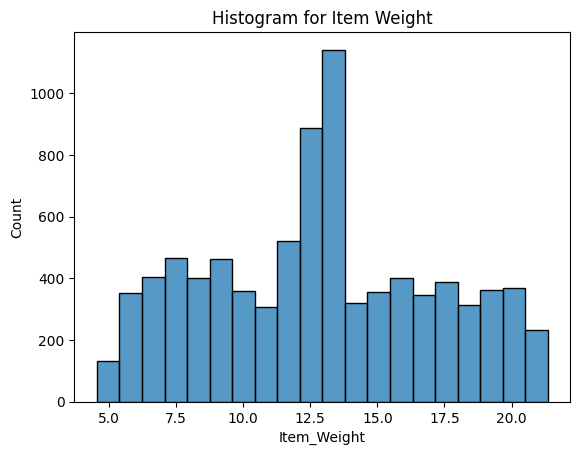

In [ ]:
#Histogram for 	Item Weight

ax = sns.histplot(data = df , x  = "Item_Weight" , bins = 20 , edgecolor = "black" )
ax.ticklabel_format(style='plain');
ax.set_title("Histogram for Item Weight");

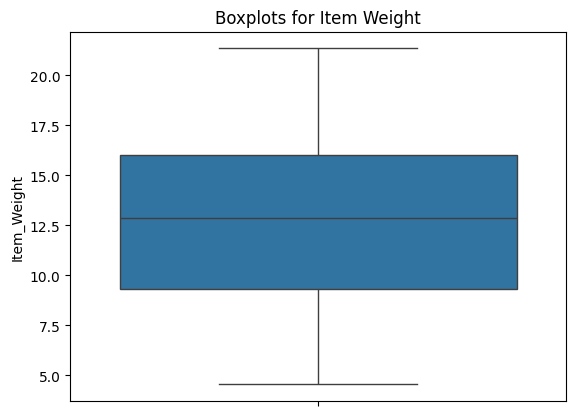

In [ ]:
# Boxplots for Item Weight
ax = sns.boxplot(data = df ,  y = "Item_Weight")
ax.set_title("Boxplots for Item Weight");

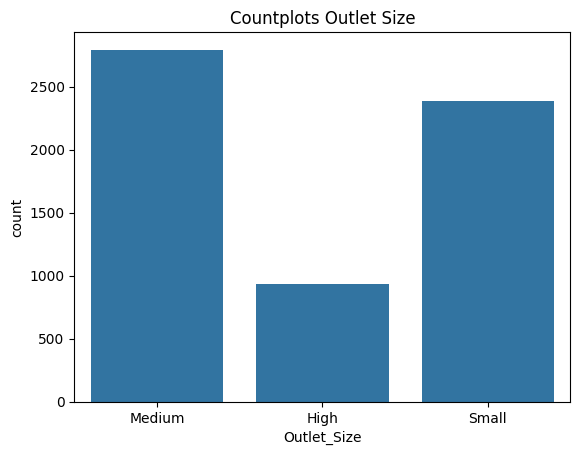

In [ ]:
#Countplots Outlet_Size
ax = sns.countplot(data = df , x = "Outlet_Size")
ax.set_title("Countplots Outlet Size");

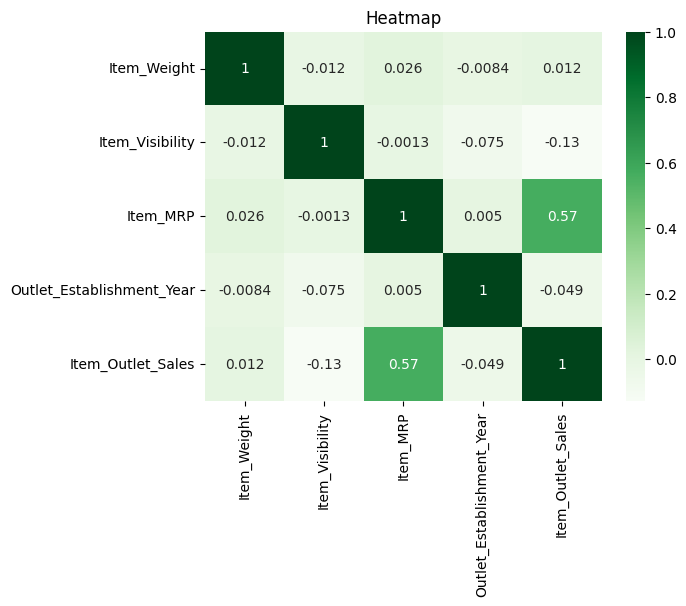

In [ ]:
#Heatmap
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr , annot = True , cmap = "Greens")
ax.set_title("Heatmap");

## Feature Inspection

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
def explore_categorical(df, x, fillna = True, placeholder = 'NaN',
                        figsize = (6,4), order = None):

  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}")

  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

<ipython-input-91-a8912a690d62>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


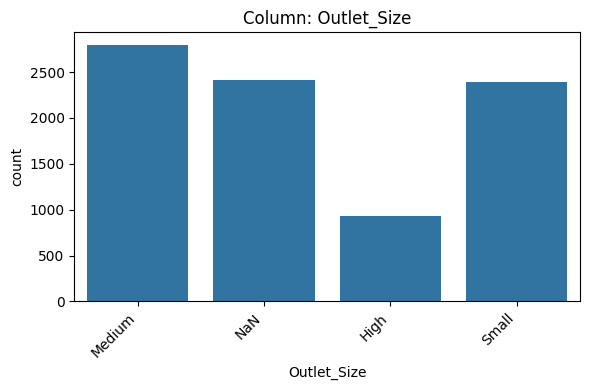

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, 'Outlet_Size' , placeholder = "NaN" );

What type of feature is it? (Categorical (nominal), ordinal, numeric)


*   Categorical (Ordinal)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


*   2410 , 28.28% , impute with NaN


Is the feature constant or quasi-constant?


*   Not Constant



What is the cardinality? Is it high (>10)?


*  4 < 10 , which is not high cardinality



Would we know this feature before the target is determined?


* Yes  



Is there a business case/understanding reason to exclude based on our business case?



*   





In [ ]:
# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'NaN',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  plt.show()

  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  nunique = temp_df[x].nunique()
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

<ipython-input-89-7da489dc9956>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


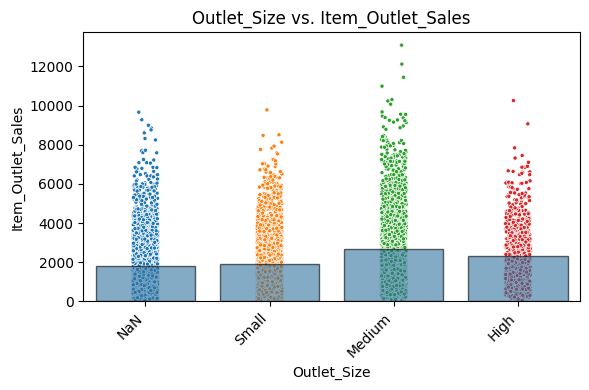

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
order = ['NaN','Small','Medium','High',]
fig, ax = plot_categorical_vs_target(df, x='Outlet_Size', fillna=True , order = order );


Based on your business understanding, would you expect this feature to be a predictor of the target?


*  Yes


Does this feature appear to be a predictor of the target?


*    Yes, there is a variabilty in price with this feature


